In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./combinedData.csv',index_col=None, header=0,sep=',')

In [3]:
df.head()
df2 = df.drop(['Estimated', 'COUNTY', 'RETIRED','STATION','DATE','DAY'], axis = 1)
df2.head()

,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,9 am,10 am,...,6 pm,7 pm,8 pm,9 pm,10 pm,11 pm,12 mid,TOTAL,Station number,Direction
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,228,North
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,228,North
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,228,North
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,228,North
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,228,North


In [4]:
group1 = df2.groupby(['Station number','Direction'])
group1

In [5]:
STANDARD_DEV = group1.std()
MEAN = group1.mean()
MEAN.head()

1 am       2 am       3 am       4 am  \
Station number Direction                                                
8              East         1.640993   1.237817   0.700128   0.459573   
               North        1.785714   1.107143   0.821429   0.500000   
               South        1.071429   0.714286   0.357143   0.500000   
               West         1.291477   0.839022   0.599927   0.432196   
26             North      111.533251  88.068358  83.696876  87.356944   

                                5 am        6 am        7 am        8 am  \
Station number Direction                                                   
8              East         0.403541    1.732980    4.117905   13.843767   
               North        0.321429    1.750000    2.642857    5.821429   
               South        0.535714    2.607143    3.750000    8.892857   
               West         0.475817    2.315204    5.013689   13.081949   
26             North      122.058460  199.324157  269.670275  352.252706   

                                9 am       10 am     ...             4 pm  \
Station number Direction                             ...                    
8              East        15.052747   14.661982     ...        20.209162   
               North       10.107143   11.678571     ...        13.071429   
               South        7.892857   10.321429     ...        10.642857   
               West        11.620186   12.268297     ...        20.911663   
26             North      391.448500  484.120012     ...       773.401175   

                                5 pm        6 pm        7 pm        8 pm  \
Station number Direction                                                   
8              East        21.426355   22.715094   18.309181   12.589524   
               North       15.678571   14.892857   12.250000    7.535714   
               South       11.607143   10.321429    8.321429    6.964286   
               West        17.198211   17.196204   13.776967   10.993612   
26             North      765.510362  707.325704  585.245902  479.120940   

                                9 pm       10 pm       11 pm      12 mid  \
Station number Direction                                                   
8              East         9.946341    7.866216    4.744296    2.595729   
               North        7.464286    7.321429    5.285714    3.428571   
               South        6.535714    6.035714    3.714286    1.678571   
               West        10.384559    8.670013    4.311006    2.231794   
26             North      396.426539  313.426848  236.156820  159.299722   

                                TOTAL  
Station number Direction               
8              East        252.708158  
               North       194.142857  
               South       164.392857  
               West        227.891769  
26             North      9877.120322  

[5 rows x 25 columns]

In [6]:
spec_mean = lambda df: (df -df.mean())/df.std()
df3 = group1.transform(spec_mean)
df3.head()

,1 am,2 am,3 am,4 am,5 am,6 am,7 am,8 am,9 am,10 am,...,4 pm,5 pm,6 pm,7 pm,8 pm,9 pm,10 pm,11 pm,12 mid,TOTAL
0,-0.858334,-0.783304,-0.719601,-1.034546,-1.341232,-1.690358,-1.780509,-1.930003,-2.110275,-2.239903,...,-2.213782,-2.237251,-2.082244,-1.933887,-1.657553,-1.514284,-1.279862,-1.140772,-0.881045,-2.541624
1,-0.858334,-0.783304,-0.719601,-1.034546,-1.341232,-1.690358,-1.780509,-1.930003,-2.110275,-2.239903,...,-2.213782,-2.237251,-2.082244,-1.933887,-1.657553,-1.514284,-1.279862,-1.140772,-0.881045,-2.541624
2,-0.858334,-0.783304,-0.719601,-1.034546,-1.341232,-1.690358,-1.780509,-1.930003,-2.110275,-2.239903,...,-2.213782,-2.237251,-2.082244,-1.933887,-1.657553,-1.514284,-1.279862,-1.140772,-0.881045,-2.541624
3,-0.858334,-0.783304,-0.719601,-1.034546,-1.341232,-1.690358,-1.780509,-1.930003,-2.110275,-2.239903,...,-2.213782,-2.237251,-2.082244,-1.933887,-1.657553,-1.514284,-1.279862,-1.140772,-0.881045,-2.541624
4,-0.858334,-0.783304,-0.719601,-1.034546,-1.341232,-1.690358,-1.780509,-1.930003,-2.110275,-2.239903,...,-2.213782,-2.237251,-2.082244,-1.933887,-1.657553,-1.514284,-1.279862,-1.140772,-0.881045,-2.541624


In [7]:
test = df2[(df2['Station number']==228) & (df2['Direction']=='North')]
std = test.std()
mean = test.mean()

In [8]:
df3.columns = df3.columns + "_zscore"
df3.head()

,1 am_zscore,2 am_zscore,3 am_zscore,4 am_zscore,5 am_zscore,6 am_zscore,7 am_zscore,8 am_zscore,9 am_zscore,10 am_zscore,...,4 pm_zscore,5 pm_zscore,6 pm_zscore,7 pm_zscore,8 pm_zscore,9 pm_zscore,10 pm_zscore,11 pm_zscore,12 mid_zscore,TOTAL_zscore
0,-0.858334,-0.783304,-0.719601,-1.034546,-1.341232,-1.690358,-1.780509,-1.930003,-2.110275,-2.239903,...,-2.213782,-2.237251,-2.082244,-1.933887,-1.657553,-1.514284,-1.279862,-1.140772,-0.881045,-2.541624
1,-0.858334,-0.783304,-0.719601,-1.034546,-1.341232,-1.690358,-1.780509,-1.930003,-2.110275,-2.239903,...,-2.213782,-2.237251,-2.082244,-1.933887,-1.657553,-1.514284,-1.279862,-1.140772,-0.881045,-2.541624
2,-0.858334,-0.783304,-0.719601,-1.034546,-1.341232,-1.690358,-1.780509,-1.930003,-2.110275,-2.239903,...,-2.213782,-2.237251,-2.082244,-1.933887,-1.657553,-1.514284,-1.279862,-1.140772,-0.881045,-2.541624
3,-0.858334,-0.783304,-0.719601,-1.034546,-1.341232,-1.690358,-1.780509,-1.930003,-2.110275,-2.239903,...,-2.213782,-2.237251,-2.082244,-1.933887,-1.657553,-1.514284,-1.279862,-1.140772,-0.881045,-2.541624
4,-0.858334,-0.783304,-0.719601,-1.034546,-1.341232,-1.690358,-1.780509,-1.930003,-2.110275,-2.239903,...,-2.213782,-2.237251,-2.082244,-1.933887,-1.657553,-1.514284,-1.279862,-1.140772,-0.881045,-2.541624


In [54]:
df_toExport = pd.concat([df2,df3], axis =1)

In [ ]:
df

In [25]:
bins = [-1000,-2,-1,-.35,.35,1,2,1000]
names = ['below extreme','-z2', '-z1','norm','z1', 'z2','above extreme']

In [26]:
df4 = df3.apply(lambda x: pd.cut(x, bins=bins,labels= names))

path =r'./association' # use your path
allFiles = glob.glob(path + "/*/*.csv")
dir_name = '\\'.join(file_.split('\\')[:-1]);
df4.to_csv(p,sep=',',index=False)


In [27]:
df4.head()

,1 am_zscore,2 am_zscore,3 am_zscore,4 am_zscore,5 am_zscore,6 am_zscore,7 am_zscore,8 am_zscore,9 am_zscore,10 am_zscore,...,4 pm_zscore,5 pm_zscore,6 pm_zscore,7 pm_zscore,8 pm_zscore,9 pm_zscore,10 pm_zscore,11 pm_zscore,12 mid_zscore,TOTAL_zscore
0,-z1,-z1,-z1,-z2,-z2,-z2,-z2,-z2,below extreme,below extreme,...,below extreme,below extreme,below extreme,-z2,-z2,-z2,-z2,-z2,-z1,below extreme
1,-z1,-z1,-z1,-z2,-z2,-z2,-z2,-z2,below extreme,below extreme,...,below extreme,below extreme,below extreme,-z2,-z2,-z2,-z2,-z2,-z1,below extreme
2,-z1,-z1,-z1,-z2,-z2,-z2,-z2,-z2,below extreme,below extreme,...,below extreme,below extreme,below extreme,-z2,-z2,-z2,-z2,-z2,-z1,below extreme
3,-z1,-z1,-z1,-z2,-z2,-z2,-z2,-z2,below extreme,below extreme,...,below extreme,below extreme,below extreme,-z2,-z2,-z2,-z2,-z2,-z1,below extreme
4,-z1,-z1,-z1,-z2,-z2,-z2,-z2,-z2,below extreme,below extreme,...,below extreme,below extreme,below extreme,-z2,-z2,-z2,-z2,-z2,-z1,below extreme


In [28]:
pd.value_counts(df4['1 am_zscore'].values)

-z1              312629
norm             238969
z1               117546
z2                93157
-z2               72891
above extreme     34355
below extreme      1683
dtype: int64

In [29]:
result = df4.apply(pd.value_counts).fillna(0); result

,1 am_zscore,2 am_zscore,3 am_zscore,4 am_zscore,5 am_zscore,6 am_zscore,7 am_zscore,8 am_zscore,9 am_zscore,10 am_zscore,...,4 pm_zscore,5 pm_zscore,6 pm_zscore,7 pm_zscore,8 pm_zscore,9 pm_zscore,10 pm_zscore,11 pm_zscore,12 mid_zscore,TOTAL_zscore
-z1,312629,307777,288052,251683,189186,116324,80979,74542,128020,175072,...,199393,183163,182015,218620,234802,238725,237231,257290,284906,190074
-z2,72891,70409,77677,86684,125011,184460,207461,201163,140180,101947,...,105510,117254,121054,98812,92956,92420,93893,94492,83162,102187
above extreme,34355,33859,31194,25964,20732,14080,9274,6661,12018,19590,...,23940,21712,21904,27285,30246,29084,29733,30957,32502,20766
below extreme,1683,1890,2554,5076,4321,1804,2321,7453,18581,21032,...,14740,14734,14094,12880,10687,10553,9753,4568,2384,18990
norm,238969,248098,257471,268796,250501,210765,176814,167214,216456,259208,...,249525,239722,236051,255815,261724,256451,259753,253292,250736,247929
z1,117546,121613,130556,151783,198861,250098,302027,329770,268736,207172,...,187462,203659,203885,167942,152351,152436,149316,139951,127389,195600
z2,93157,87584,83726,81244,82618,93699,92354,84427,87239,87209,...,90660,90986,92227,89876,88464,91561,91551,90680,90151,95684


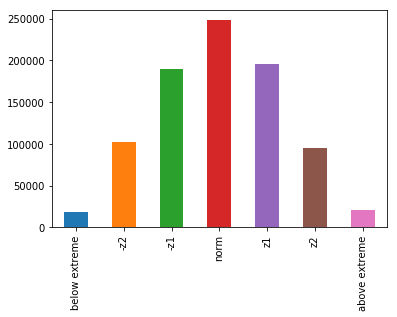

In [51]:
new_cols = ['below extreme', '-z2', '-z1', 'norm', 'z1', 'z2', 'above extreme']
result.TOTAL_zscore[new_cols].plot(kind = 'bar')

In [52]:
df5 = result.drop(['TOTAL_zscore'],axis = 1)
dfSums = df5.sum(axis=1)
df6 = dfSums[new_cols]

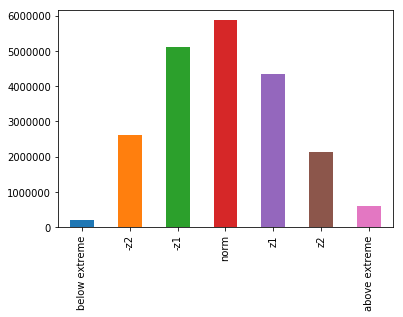

In [53]:
df6.plot(kind = 'bar', sort_columns=True)